In [1]:
%matplotlib inline


# 2D free support Wasserstein barycenters of distributions


Illustration of 2D Wasserstein barycenters if discributions that are weighted
sum of diracs.




In [2]:
# Author: Vivien Seguy <vivien.seguy@iip.ist.i.kyoto-u.ac.jp>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl
import ot

Generate data
 -------------
%% parameters and data generation



In [3]:
N = 3
d = 2
measures_locations = []
measures_weights = []

for i in range(N):

    n_i = np.random.randint(low=1, high=20)  # nb samples

    mu_i = np.random.normal(0., 4., (d,))  # Gaussian mean

    A_i = np.random.rand(d, d)
    cov_i = np.dot(A_i, A_i.transpose())  # Gaussian covariance matrix

    x_i = ot.datasets.make_2D_samples_gauss(n_i, mu_i, cov_i)  # Dirac locations
    b_i = np.random.uniform(0., 1., (n_i,))
    b_i = b_i / np.sum(b_i)  # Dirac weights

    measures_locations.append(x_i)
    measures_weights.append(b_i)

Compute free support barycenter
-------------



In [4]:
k = 10  # number of Diracs of the barycenter
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations
b = np.ones((k,)) / k  # weights of the barycenter (it will not be optimized, only the locations are optimized)

X = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b)

Plot data
---------



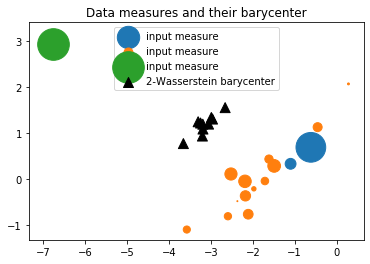

In [5]:
pl.figure(1)
for (x_i, b_i) in zip(measures_locations, measures_weights):
    color = np.random.randint(low=1, high=10 * N)
    pl.scatter(x_i[:, 0], x_i[:, 1], s=b_i * 1000, label='input measure')
pl.scatter(X[:, 0], X[:, 1], s=b * 1000, c='black', marker='^', label='2-Wasserstein barycenter')
pl.title('Data measures and their barycenter')
pl.legend(loc=0)
pl.show()